# Introducción 

A gas turbine is largely used to generate electricity around the world. In recent years, the awareness of greenhouse gases is raised and the emissions of the gas-turbines are controlled at certain limits according to the environmental regulations.

Generally, the emission gases are measured by sensors and it is possible that the sensors can generate inaccurate data due to its malfunction or issue with calibration.

Normally, the gas turbines for power plants have constant RPMs, but it does not mean that the level of the emission gases is contestant too. Because the performance of a gas turbine highly depends on many variables like temperature, air pressure, and humidity. These variables are not constant during the day or months, so it is important to measure the true level of the output emissions.

If I can build, a machine learning model that can accurately predict the level of emission gases, it can be a nice secondary system next to the sensory monitory systems. In case of a malfunction, we can still use the machine learning model to detect the main function of a sensor and at the same time the machine leaning model can work as warning system for the seosory systems( if the sensor does not work).

The authors are the following papers had collected the dataset and researched how to design a machine learning model with very low MAE. I’m really interested if I can create a machine learning model which has low MAE as their models. Source of the paper: https://journals.tubitak.gov.tr/elektrik/issues/elk-19-27-6/elk-27-6-54-1807-87.pdf

The dataset contains 36733 rows and 11 colums; 9 numerical features and two target variabels(CO and NOX). According to the paper above, the CO and NOX are the main pollution gases from a gas-turbine engine.

# Imports 

In [2]:
# TensorFlow
from tensorflow import keras
from tensorflow.keras import layers

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Data and plots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump, load

First, we read the csv from the path we saved the data.

Then we drop from the dataframe the column corresponding to the CO emissions as in this example we just want to predict Nox emissions.

Then we store the columns names in a new variable and calculate some statistics.

In [8]:
df = pd.read_csv("power-plant-gas-emissions.csv", sep = ',')
df.head()

,ambient_temperature,ambient_pressure,ambient_humidity,air_filter_difference_pressure,gas_turbine_exhaust_pressure,turbine_inlet_temperature,turbine_after_temperature,compressor_discharge_pressure,turbine_energy_yield,CO,NOx
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [45]:
df.shape

(36733, 10)

- Ambient temperature (AT) ºC
- Ambient pressure (AP) mbar 
- Ambient humidity (AH) (%) 
- Air filter difference pressure (AFDP) mbar 
- Gas turbine exhaust pressure (GTEP) mbar 
- Turbine inlet temperature (TIT) C 
- Turbine after temperature (TAT) C 
- Compressor discharge pressure (CDP) mbar 
- Turbine energy yield (TEY) MWH 
- Carbon monoxide (CO) mg/m3 
- Nitrogen oxides (NOx) mg/m3 

In [9]:
df = df.drop(['CO'], axis=1) # We unselect from the input columns CO

columns = df.columns

statistics = df.describe(include = 'all')
statistics.T

,count,mean,std,min,25%,50%,75%,max
ambient_temperature,36733.0,17.712726,7.447451,-6.2348,11.7810,17.8010,23.6650,37.1030
ambient_pressure,36733.0,1013.070165,6.463346,985.8500,1008.8000,1012.6000,1017.0000,1036.6000
ambient_humidity,36733.0,77.867015,14.461355,24.0850,68.1880,80.4700,89.3760,100.2000
air_filter_difference_pressure,36733.0,3.925518,0.773936,2.0874,3.3556,3.9377,4.3769,7.6106
gas_turbine_exhaust_pressure,36733.0,25.563801,4.195957,17.6980,23.1290,25.1040,29.0610,40.7160
turbine_inlet_temperature,36733.0,1081.428084,17.536373,1000.8000,1071.8000,1085.9000,1097.0000,1100.9000
turbine_after_temperature,36733.0,546.158517,6.842360,511.0400,544.7200,549.8800,550.0400,550.6100
compressor_discharge_pressure,36733.0,133.506404,15.618634,100.0200,124.4500,133.7300,144.0800,179.5000
turbine_energy_yield,36733.0,12.060525,1.088795,9.8518,11.4350,11.9650,12.8550,15.1590
NOx,36733.0,65.293067,11.678357,25.9050,57.1620,63.8490,71.5480,119.9100


## Inputs-target correlation 

The next step will be to calculate the correlation between the input columns and the target. 

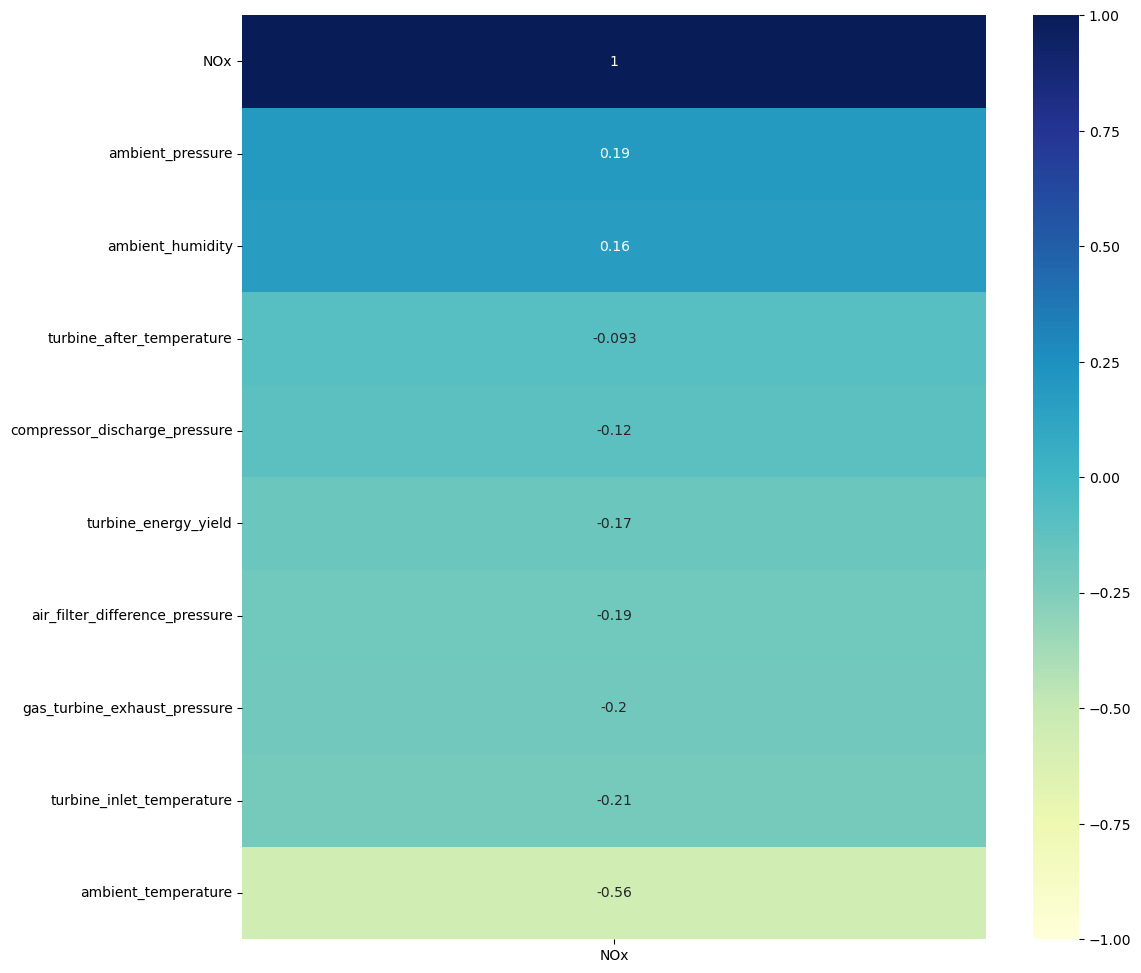

In [10]:
fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(df.corr()[['NOx']].sort_values('NOx').tail(11),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);

ax.invert_yaxis()

<Axes: >

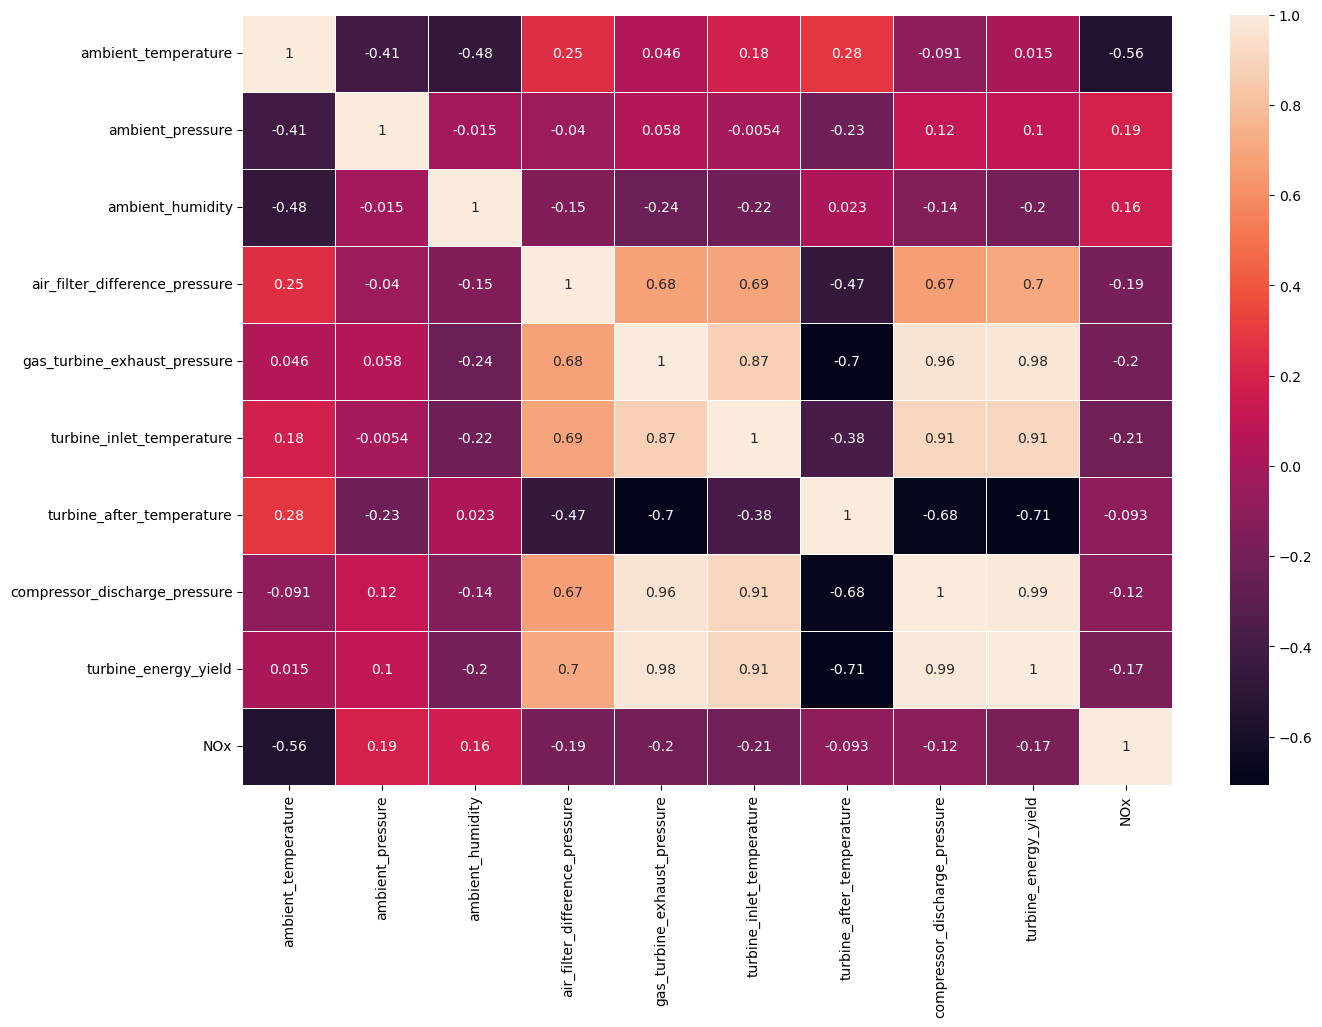

In [46]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,linewidths=0.5,annot=True)

## Histogram

[None, None, None, None, None, None, None, None, None, None, None, None]

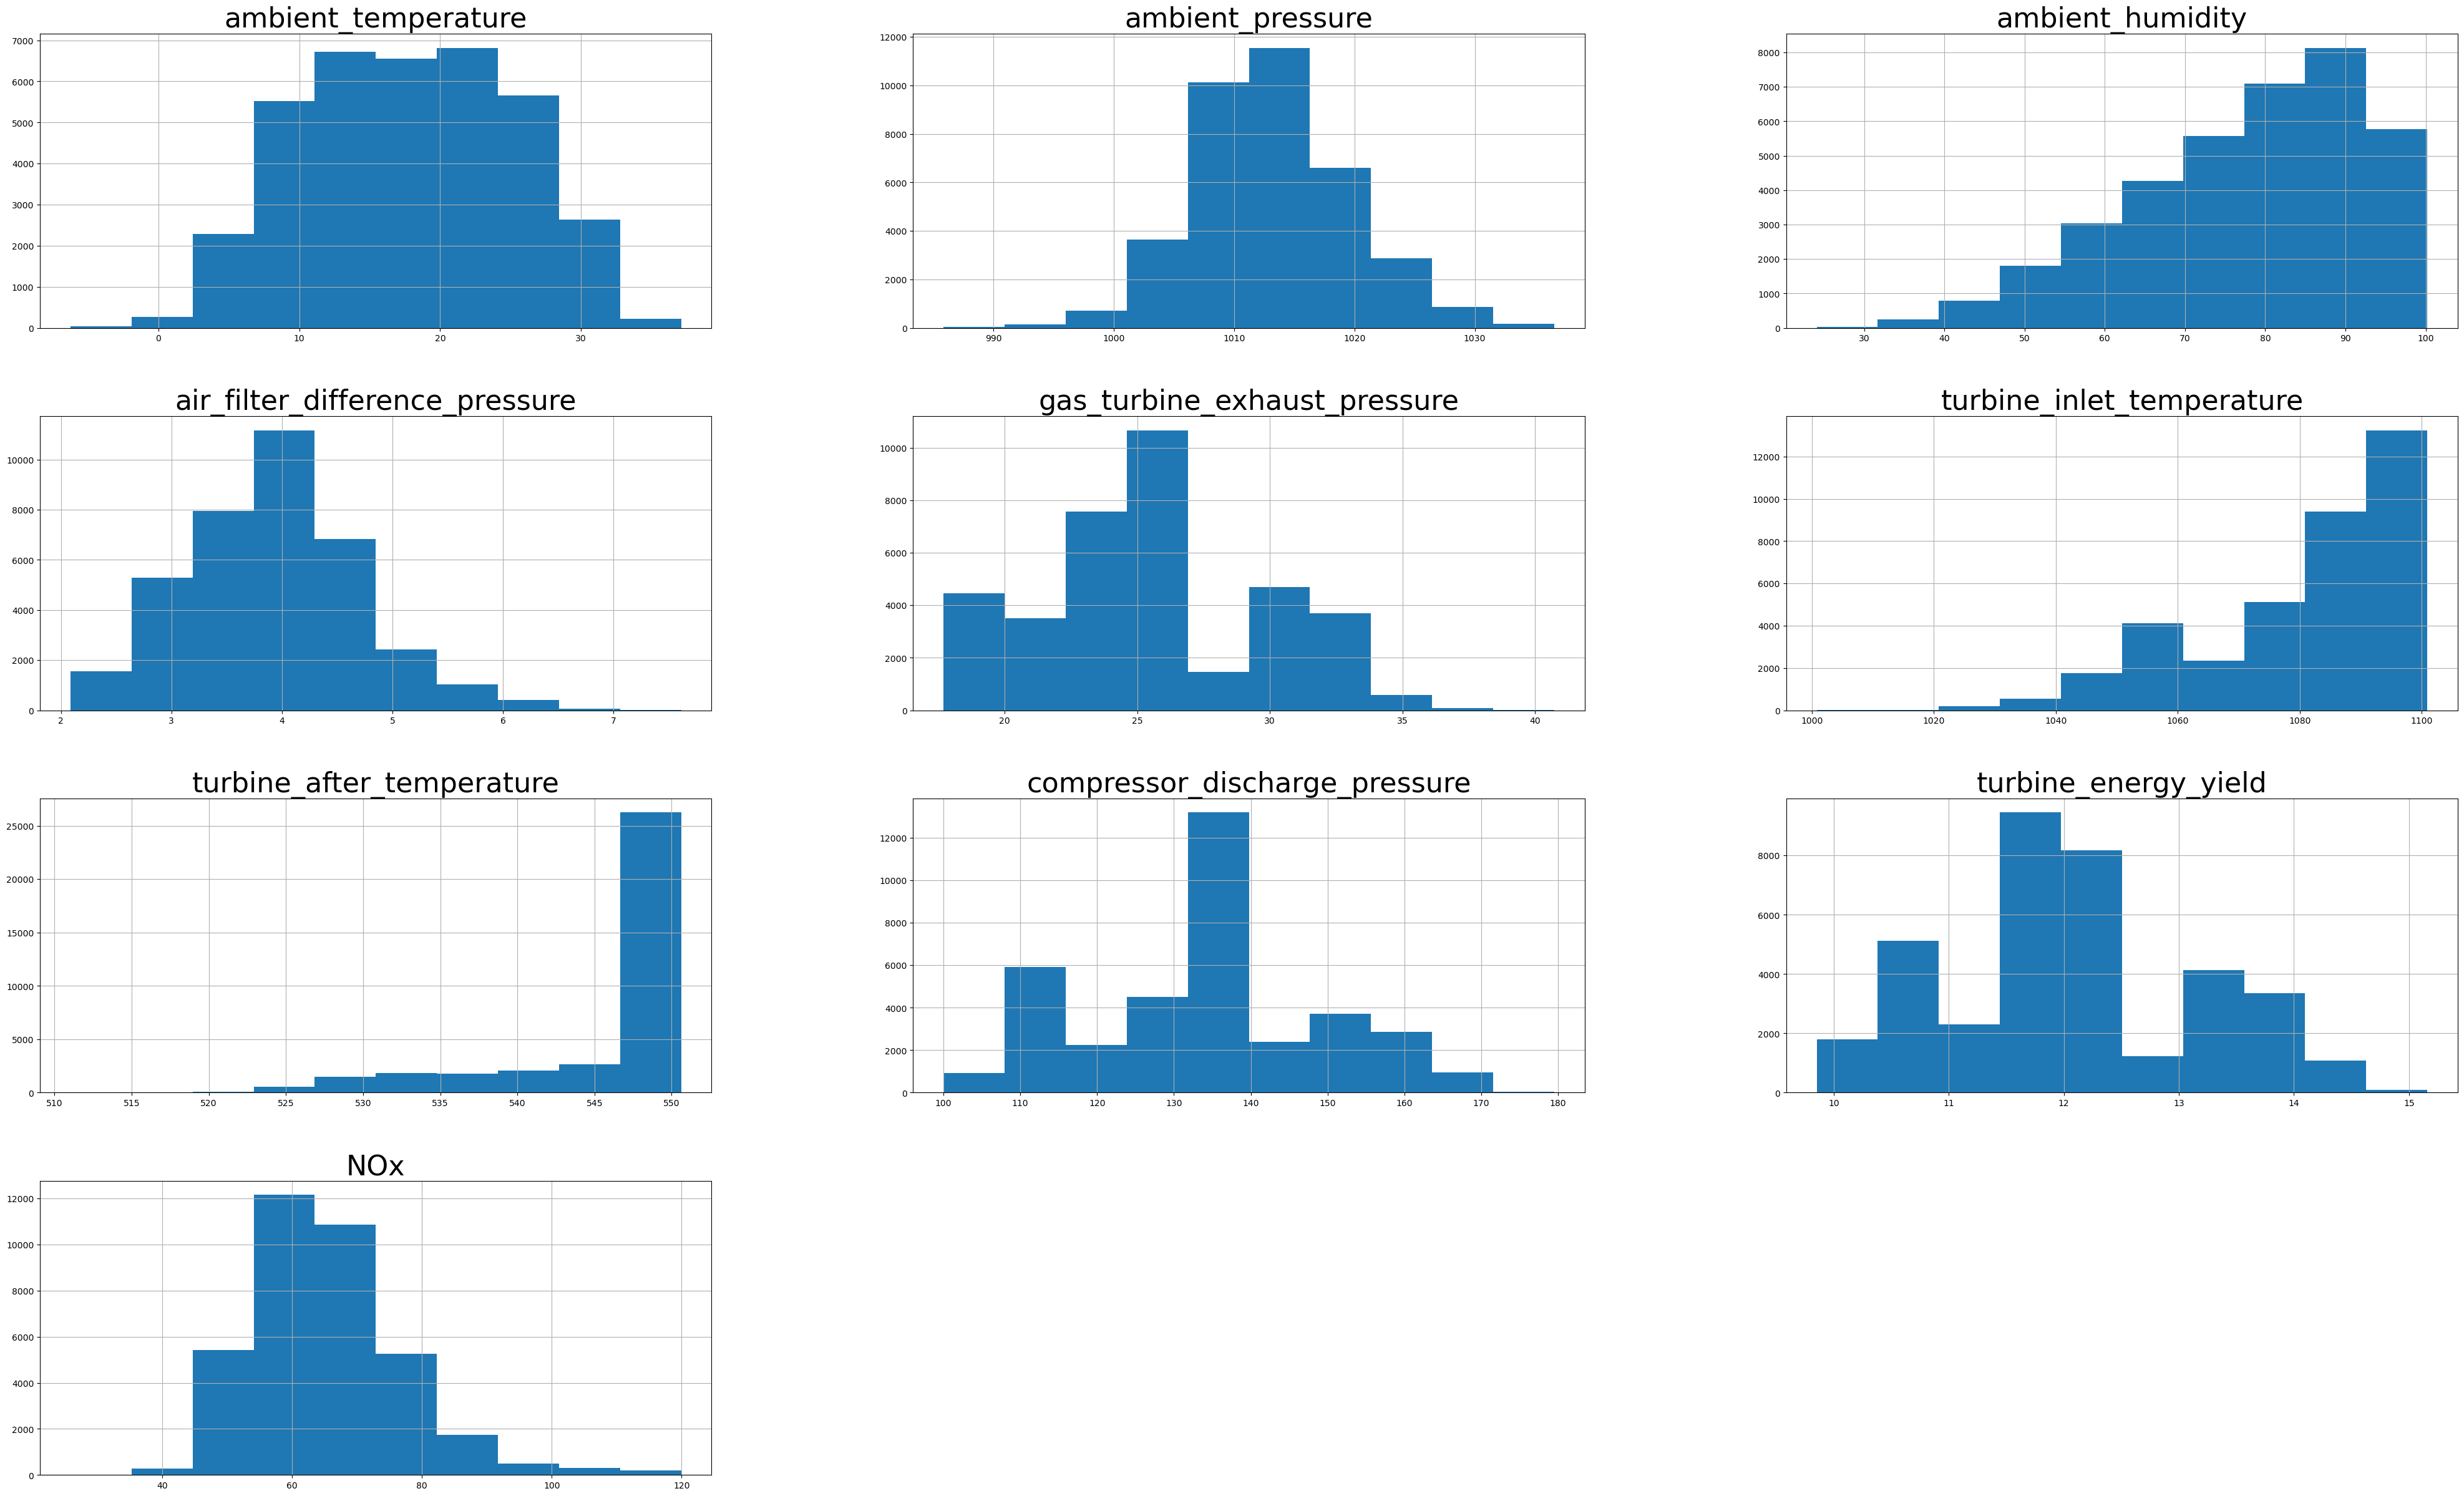

In [11]:
fig = df.hist(figsize=(50, 30))

[x.title.set_size(32) for x in fig.ravel()]

Nan values

In [44]:
df.isna().sum()

ambient_temperature               0
ambient_pressure                  0
ambient_humidity                  0
air_filter_difference_pressure    0
gas_turbine_exhaust_pressure      0
turbine_inlet_temperature         0
turbine_after_temperature         0
compressor_discharge_pressure     0
turbine_energy_yield              0
NOx                               0
dtype: int64

## Scaling the data 

We standarize features for mean 0 and std 1 using StandardScaler from Sklearn.

In [47]:
# Define standard scaler
scaler = StandardScaler()

# Transform data
scaled = scaler.fit_transform(df)

# Convert numpy array to pandas dataframe
df_scaled = pd.DataFrame(scaled, columns = columns)

## Train test split 

From the scaled dataframe we select our inputs (X) and target(y).

Then we divide the data into training (67%) and testing (33%).


In [48]:
# Separate between inputs and target

X = df_scaled.iloc[:,:-1] 
y = df_scaled.iloc[:,-1]

# Split samples between train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

## Build a model 

We will build a sequential model with three layers:
1. 12 neurons, ‘tanh’ as the activation function and receive 9 inputs from the input layer. 
2. 8 neurons, ‘tanh’ as the activation function and L2 regularization. 
3. 1 neuron for the output layer, and ‘linear’ as the activation function.

In [49]:
model = keras.Sequential()

model.add(layers.Dense(12, input_shape=(X_train.shape[1],), activation='tanh'))
model.add(layers.Dense(8, activation='tanh', kernel_regularizer='l2'))
model.add(layers.Dense(1, activation='linear'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                120       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 233 (932.00 Byte)
Trainable params: 233 (932.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
def draw_neural_net(left, right, bottom, top, layer_sizes):
    '''
    From https://gist.github.com/craffel/2d727968c3aaebd10359#file-draw_neural_net-py
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    fig = plt.figure(figsize=(3, 3))
    ax = fig.gca()
    ax.axis('off')

    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

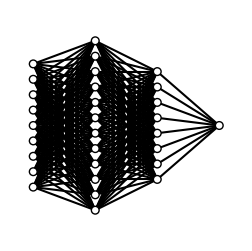

In [51]:
draw_neural_net(.1, .9, .1, .9, [9, 12, 8, 1])

## Train 

To train the model we use Adam as the optimizer and mean squared error as the loss function.

We set a batch size of 100 and 400 epochs. 

We will use an early stopping callback with a patience of 10 epochs.

In [52]:
model.compile(optimizer = 'adam', loss = 'mse')

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit(X_train, y_train, validation_split = 0.2,
                    batch_size = 100, epochs = 400,
                    callbacks = [early_stop])

Epoch 1/400
197/197 [==============================] - 1s 3ms/step - loss: 0.7811 - val_loss: 0.6090
Epoch 2/400
197/197 [==============================] - 0s 2ms/step - loss: 0.5546 - val_loss: 0.4755
Epoch 3/400
197/197 [==============================] - 0s 2ms/step - loss: 0.4368 - val_loss: 0.3858
Epoch 4/400
197/197 [==============================] - 0s 2ms/step - loss: 0.3688 - val_loss: 0.3431
Epoch 5/400
197/197 [==============================] - 0s 2ms/step - loss: 0.3369 - val_loss: 0.3229
Epoch 6/400
197/197 [==============================] - 0s 2ms/step - loss: 0.3199 - val_loss: 0.3089
Epoch 7/400
197/197 [==============================] - 0s 2ms/step - loss: 0.3081 - val_loss: 0.3008
Epoch 8/400
197/197 [==============================] - 0s 2ms/step - loss: 0.2999 - val_loss: 0.2936
Epoch 9/400
197/197 [==============================] - 0s 2ms/step - loss: 0.2933 - val_loss: 0.2902
Epoch 10/400
197/197 [==============================] - 0s 2ms/step - loss: 0.2889 - val_lo

197/197 [==============================] - 0s 2ms/step - loss: 0.2341 - val_loss: 0.2369
Epoch 82/400
197/197 [==============================] - 0s 2ms/step - loss: 0.2338 - val_loss: 0.2360
Epoch 83/400
197/197 [==============================] - 0s 2ms/step - loss: 0.2332 - val_loss: 0.2366
Epoch 84/400
197/197 [==============================] - 0s 2ms/step - loss: 0.2337 - val_loss: 0.2349
Epoch 85/400
197/197 [==============================] - 0s 2ms/step - loss: 0.2326 - val_loss: 0.2350
Epoch 86/400
197/197 [==============================] - 0s 2ms/step - loss: 0.2326 - val_loss: 0.2365
Epoch 87/400
197/197 [==============================] - 0s 2ms/step - loss: 0.2328 - val_loss: 0.2367
Epoch 88/400
197/197 [==============================] - 0s 2ms/step - loss: 0.2318 - val_loss: 0.2366
Epoch 89/400
197/197 [==============================] - 0s 2ms/step - loss: 0.2316 - val_loss: 0.2352
Epoch 90/400
197/197 [==============================] - 0s 2ms/step - loss: 0.2323 - val_loss: 

<Axes: >

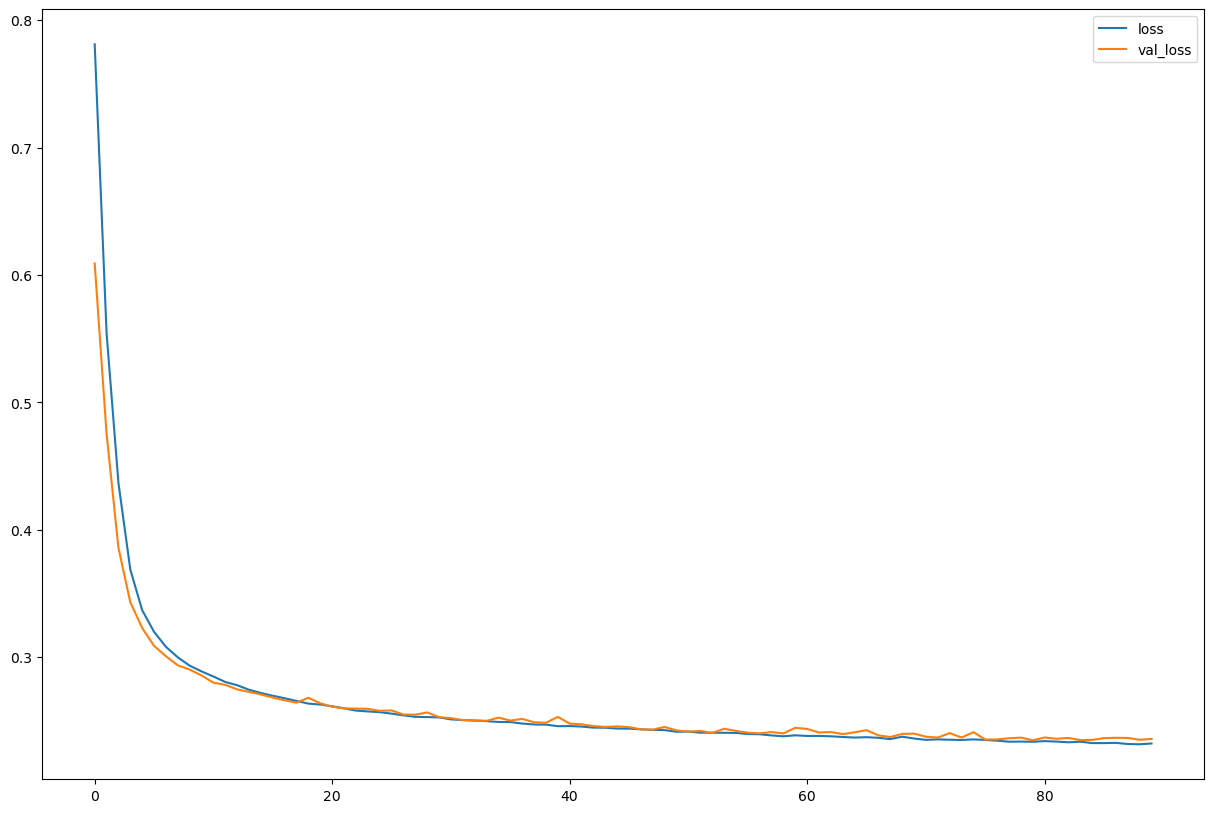

In [53]:
history_df = pd.DataFrame(model.history.history)
history_df.plot(figsize=(15,10))

## Test 

In [27]:
y_predicted = model.predict(X_test)

print('r2_score: ',r2_score(y_test, y_predicted))

379/379 [==============================] - 1s 1ms/step
r2_score:  0.7677989972706507


### Linear regression analysis 

Text(0, 0.5, 'Predicted NOx')

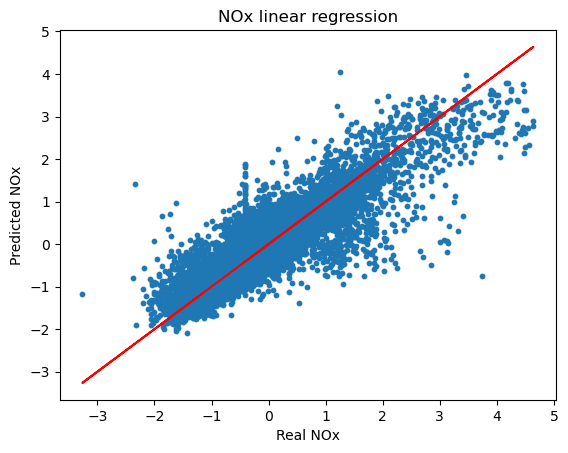

In [36]:
plt.scatter(y_test, y_predicted, s=10)
plt.plot(y_test, y_test, c= 'red')
plt.title('NOx linear regression')
plt.xlabel('Real NOx')
plt.ylabel('Predicted NOx')

## Deployment 

Save trained model

In [39]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


Load model

In [40]:
loaded_model = keras.models.load_model('model')

Save and load scaler

In [42]:
dump(scaler, '/content/std_scaler.bin', compress=True)

sc = load('/content/std_scaler.bin')

In [43]:
in_array = np.array([5.0,1020.0,85.3,4.23,20.12,1100.0,552.196,139.54,12.65,0.00])

X_deploy = sc.transform(in_array.reshape(1,-1))
X_input = X_deploy[0][0:9]

X_input = pd.Series(X_input)
y_deploy = loaded_model.predict(X_input.values.reshape(1,-1))

deploy_row = np.append(X_input, y_deploy[0])

Nox_deploy = sc.inverse_transform(deploy_row.reshape(1,-1))[0][9]

print('NOx emissions predicted:',Nox_deploy)

1/1 [==============================] - 0s 59ms/step
NOx emissions predicted: 84.4098264258123


C:\Users\Artelnics\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Trying to improve the model



In [55]:
df_improvement = df.drop('turbine_energy_yield', axis = 1)

In [58]:
# Define standard scaler
scaler = StandardScaler()

# Transform data
scaled = scaler.fit_transform(df_improvement)

# Convert numpy array to pandas dataframe
df_scaled_improvement = pd.DataFrame(scaled, columns = df_improvement.columns)

## Train test split 

In [59]:
# Separate between inputs and target

X = df_scaled_improvement.iloc[:,:-1] 
y = df_scaled_improvement.iloc[:,-1]

# Split samples between train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

## Build a model 

We will build a sequential model with three layers:
1. 12 neurons, ‘tanh’ as the activation function and receive 8 inputs from the input layer. 
2. 8 neurons, ‘tanh’ as the activation function and L2 regularization. 
3. 1 neuron for the output layer, and ‘linear’ as the activation function.

In [75]:
model = keras.Sequential()

model.add(layers.Dense(12, input_shape=(X_train.shape[1],), activation='tanh'))
model.add(layers.Dense(8, activation='tanh', kernel_regularizer='l2'))
model.add(layers.Dense(1, activation='linear'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 12)                108       
                                                                 
 dense_25 (Dense)            (None, 8)                 104       
                                                                 
 dense_26 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


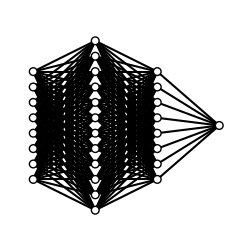

In [76]:
draw_neural_net(.1, .9, .1, .9, [8, 12, 8, 1])

## Train 

To train the model we use Adam as the optimizer and mean squared error as the loss function.

We set a batch size of 100 and 400 epochs. 

We will use an early stopping callback with a patience of 10 epochs.

In [80]:
model.compile(optimizer = 'adam', loss = 'mse')

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit(X_train, y_train, validation_split = 0.2,
                    batch_size = 100, epochs = 500,
                    callbacks = [early_stop])

Epoch 1/500
197/197 [==============================] - 1s 3ms/step - loss: 0.2249 - val_loss: 0.2262
Epoch 2/500
197/197 [==============================] - 0s 2ms/step - loss: 0.2258 - val_loss: 0.2275
Epoch 3/500
197/197 [==============================] - 0s 2ms/step - loss: 0.2250 - val_loss: 0.2381
Epoch 4/500
197/197 [==============================] - 0s 2ms/step - loss: 0.2242 - val_loss: 0.2261
Epoch 5/500
197/197 [==============================] - 0s 2ms/step - loss: 0.2242 - val_loss: 0.2261
Epoch 6/500
197/197 [==============================] - 0s 2ms/step - loss: 0.2248 - val_loss: 0.2273
Epoch 7/500
197/197 [==============================] - 0s 2ms/step - loss: 0.2243 - val_loss: 0.2278
Epoch 8/500
197/197 [==============================] - 0s 2ms/step - loss: 0.2242 - val_loss: 0.2285
Epoch 9/500
197/197 [==============================] - 0s 2ms/step - loss: 0.2239 - val_loss: 0.2277
Epoch 10/500
197/197 [==============================] - 0s 2ms/step - loss: 0.2244 - val_lo

<Axes: >

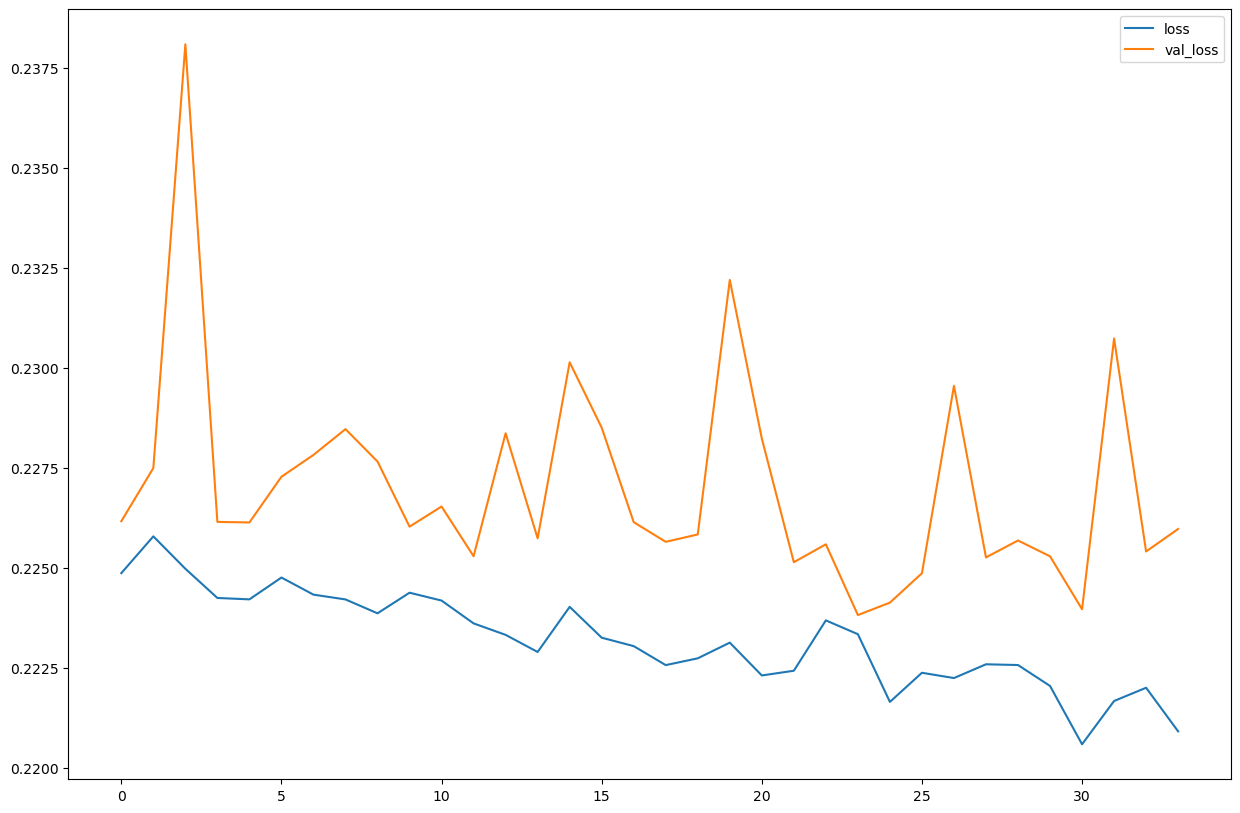

In [81]:
history_df = pd.DataFrame(model.history.history)
history_df.plot(figsize=(15,10))

In [82]:
## Test 
y_predicted = model.predict(X_test)

print('r2_score: ', r2_score(y_test, y_predicted))

379/379 [==============================] - 1s 1ms/step
r2_score:  0.7768743215453265
